# selective search를 이용하여 Object Detection을 위한 Region Proposal 영역을 도출


In [ ]:
!pip install selectivesearch

  Created wheel for selectivesearch: filename=selectivesearch-0.4-py3-none-any.whl size=4350 sha256=5fff545dcf7b4cb9ba98159bedc6426a9d7af93ff4844c8bfb2de4a115902e2a
  Stored in directory: /root/.cache/pip/wheels/83/0e/c9/4713ec9c1692e688f84fd3e80201018a02992949ca63697ba8
Successfully built selectivesearch


In [ ]:
!mkdir /content/data
!wget -O /content/data/audrey01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/audrey01.jpg

mkdir: cannot create directory ‘/content/data’: File exists
--2021-07-26 22:00:33--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/audrey01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30102 (29K) [image/jpeg]
Saving to: ‘/content/data/audrey01.jpg’

/content/data/audre 100%[===================>]  29.40K  --.-KB/s    in 0.001s  

2021-07-26 22:00:33 (21.5 MB/s) - ‘/content/data/audrey01.jpg’ saved [30102/30102]



img shape:  (450, 375, 3)


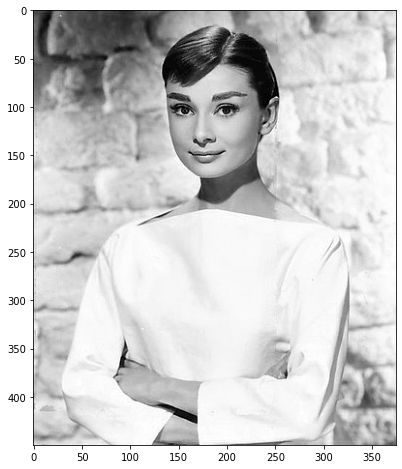

In [ ]:
import selectivesearch
import cv2
import matplotlib.pyplot as plt
import os
%matplotlib inline

# 오드리헵번 이미지를 cv2로 로드하고 matplotlib으로 시각화
img = cv2.imread('./data/audrey01.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape: ', img.shape)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.show()

### Parameters of selective search
- scale: object scale을 결정, 클수록 큰 object search
- min_size: 추천 object 최소 크기

In [ ]:
import selectivesearch

# selectivesearch.selective_search()는 이미지의 Region Proposal 정보를 반환
_, regions = selectivesearch.selective_search(img_rgb, scale=100, min_size=2000)

print(type(regions), len(regions))

<class 'list'> 41


## dictionary values of regions

- rect: x, y 시작 좌표와 너비, 높이 값을 가지며 이 값이 Detected object 후보를 나타내는 Bounding box
- size: segment로 select된 Object의 크기
- labels: 해당 rect로 지정된 Bounding box내에 있는 objects의 고유 ID
- 아래로 내려갈수록 너비와 높이 값이 큰 bounding box이며 하나의 bounding box에 여러 개의 object가 있을 확률이 커짐

In [ ]:
regions

[{'labels': [0.0], 'rect': (0, 0, 107, 167), 'size': 11166},
 {'labels': [1.0], 'rect': (15, 0, 129, 110), 'size': 8771},
 {'labels': [2.0], 'rect': (121, 0, 253, 133), 'size': 17442},
 {'labels': [3.0], 'rect': (134, 17, 73, 62), 'size': 2713},
 {'labels': [4.0], 'rect': (166, 23, 87, 176), 'size': 8639},
 {'labels': [5.0], 'rect': (136, 53, 88, 121), 'size': 4617},
 {'labels': [6.0], 'rect': (232, 79, 117, 147), 'size': 7701},
 {'labels': [7.0], 'rect': (50, 91, 133, 123), 'size': 7042},
 {'labels': [8.0], 'rect': (305, 97, 69, 283), 'size': 11373},
 {'labels': [9.0], 'rect': (0, 161, 70, 46), 'size': 2363},
 {'labels': [10.0], 'rect': (72, 171, 252, 222), 'size': 34467},
 {'labels': [11.0], 'rect': (0, 181, 118, 85), 'size': 5270},
 {'labels': [12.0], 'rect': (106, 210, 89, 101), 'size': 2868},
 {'labels': [13.0], 'rect': (302, 228, 66, 96), 'size': 2531},
 {'labels': [14.0], 'rect': (0, 253, 92, 134), 'size': 7207},
 {'labels': [15.0], 'rect': (153, 270, 173, 179), 'size': 10360},


In [ ]:
# rect 정보만 출력
cand_rects = [cand['rect'] for cand in regions]
print(cand_rects)

[(0, 0, 107, 167), (15, 0, 129, 110), (121, 0, 253, 133), (134, 17, 73, 62), (166, 23, 87, 176), (136, 53, 88, 121), (232, 79, 117, 147), (50, 91, 133, 123), (305, 97, 69, 283), (0, 161, 70, 46), (72, 171, 252, 222), (0, 181, 118, 85), (106, 210, 89, 101), (302, 228, 66, 96), (0, 253, 92, 134), (153, 270, 173, 179), (0, 305, 47, 139), (104, 312, 80, 71), (84, 360, 91, 67), (0, 362, 171, 87), (297, 364, 77, 85), (0, 91, 183, 175), (136, 23, 117, 176), (72, 171, 254, 278), (134, 17, 119, 182), (302, 97, 72, 283), (121, 0, 253, 226), (0, 91, 183, 175), (0, 0, 144, 167), (0, 0, 253, 199), (0, 253, 92, 191), (0, 91, 183, 353), (0, 171, 326, 278), (0, 97, 374, 352), (84, 312, 100, 115), (0, 91, 184, 353), (0, 91, 195, 353), (0, 0, 374, 444), (0, 0, 374, 449), (0, 0, 374, 449), (0, 0, 374, 449)]


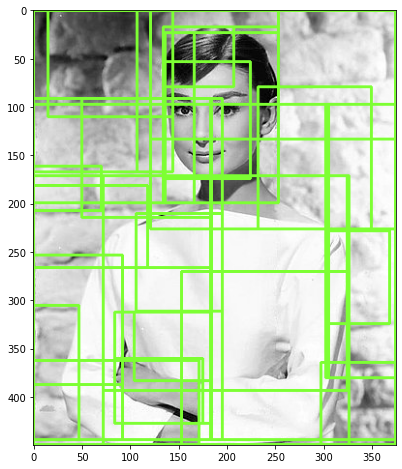

In [ ]:
# opencv의 rectangle()을 이용하여 bounding box 시각화
# rectangle()은 이미지와 좌상단 좌표, 우하단 좌표, box 컬러색, 두께 등을 인자로 입력하면 원본 이미지에 box를 그려줌

green_rgb = (125, 255, 51)
img_rgb_copy = img_rgb.copy()

for rect in cand_rects:
  
  left = rect[0]
  top = rect[1]

  # rect[2], rect[3]은 너비와 높이이므로 우하단 좌표를 구하기 위해 좌상단 좌표값에 각각을 더함
  right = left + rect[2]
  bottom = top + rect[3]
  
  img_rgb_copy = cv2.rectangle(img_rgb_copy, (left, top), (right, bottom), color=green_rgb, thickness=2)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb_copy)
plt.show()

### bounding box 크기가 큰 후보만 추출

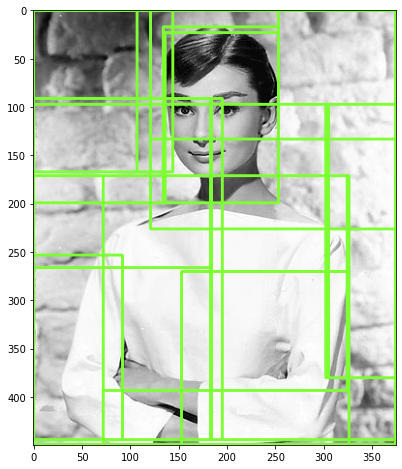

In [ ]:
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 10000]

green_rgb = (125, 255, 51)
img_rgb_copy = img_rgb.copy()

for rect in cand_rects:

  left = rect[0]
  top = rect[1]
  right = left + rect[2]
  bottom = top + rect[3]

  img_rgb_copy = cv2.rectangle(img_rgb_copy, (left, top), (right, bottom), color=green_rgb, thickness=2)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb_copy)
plt.show()

## selectivesearch scale 값에 따른 차이

In [ ]:
def selectivesearch_scale(img, scales):
  import selectivesearch

  for scale in scales:

    _, regions = selectivesearch.selective_search(img, scale=scale, min_size=2000)
    print('scale: ', scale)
    print('number: ', len(regions))

    cand_rects = [cand['rect'] for cand in regions]

    green_rgb = (125, 255, 51)
    img_copy = img.copy()

    for rect in cand_rects:

      left = rect[0]
      top = rect[1]
      right = left + rect[2]
      bottom = top + rect[3]

      img_copy = cv2.rectangle(img_copy, (left, top), (right, bottom), color=green_rgb, thickness=2)

    plt.figure(figsize=(8, 8))
    plt.imshow(img_copy)
    plt.show()
    print()

img shape:  (450, 375, 3)


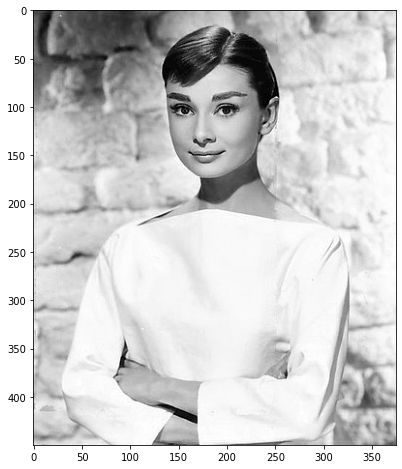

scale:  100
number:  41


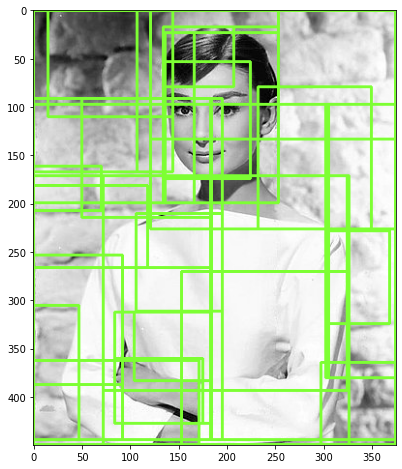


scale:  300
number:  24


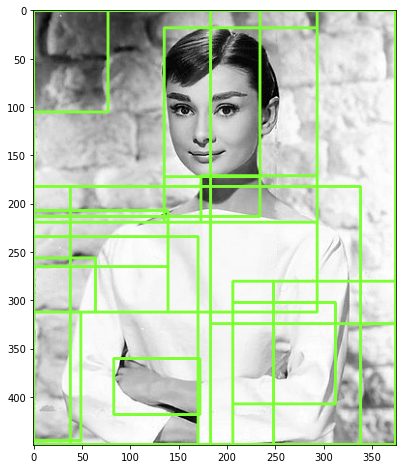


scale:  500
number:  18


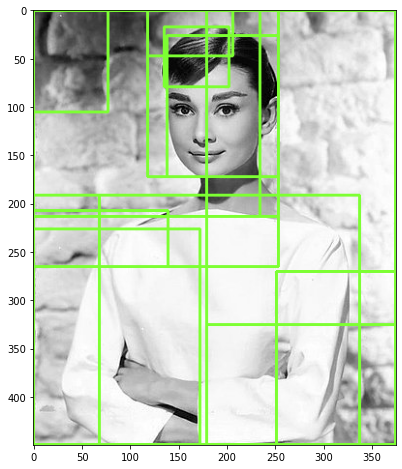


scale:  1000
number:  9


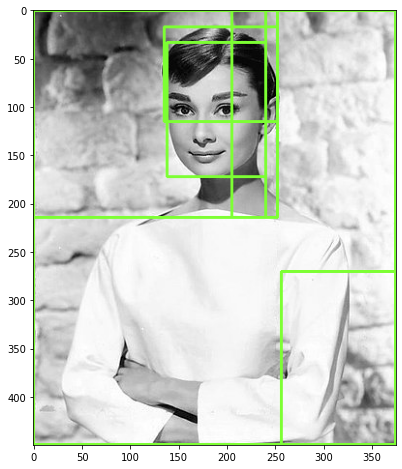

In [ ]:
import selectivesearch
import cv2
import matplotlib.pyplot as plt
import os
%matplotlib inline

# 오드리헵번 이미지를 cv2로 로드하고 matplotlib으로 시각화
img = cv2.imread('./data/audrey01.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape: ', img.shape)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.show()

selectivesearch_scale(img_rgb, [100, 300, 500, 1000])